In [1]:
%load_ext autoreload
%autoreload 2

In [53]:
from Project_Injuries.utils.read import load_data_consolidated
from Project_Injuries.data_processing import basketball_process_test_train
from Project_Injuries.math_models import linear_regr_basket
from Project_Injuries.plots import regression_plot

import sys
import os
import numpy as np

In [4]:
data_frames = load_data_consolidated("data")

data\injury_data_consolidated.xlsx


In [5]:
train_test_sets = basketball_process_test_train(data_frames["Summary_Basketball"])

In [74]:
#print(train_test_sets[0])

In [39]:
results_mul, results_single=linear_regr_basket1(train_test_sets)

In [42]:
results_mul

,Coefficients,Intercept,RÂ˛,Model,Target
0,"[0.6755870141941588, 0.11851450449777698, -0.4...",4.758523,0.344952,3 variables,PTS
1,"[-0.0659645284072114, 0.8847474476153478, -0.1...",1.672795,-0.018969,3 variables,AST
2,"[0.06067034971689756, -0.07359135440942371, 0....",0.538213,-1.661078,3 variables,REB


In [43]:
results_single

,Coefficients,Intercept,RÂ˛,Model,Target
0,[0.6179789146860954],3.786918,0.254732,1 variable,PTS
1,[0.8430249678409247],0.227495,-0.080913,1 variable,AST
2,[0.6698216491565823],0.880844,-1.906682,1 variable,REB


In [75]:
#results_single.loc[0,'Coefficients']

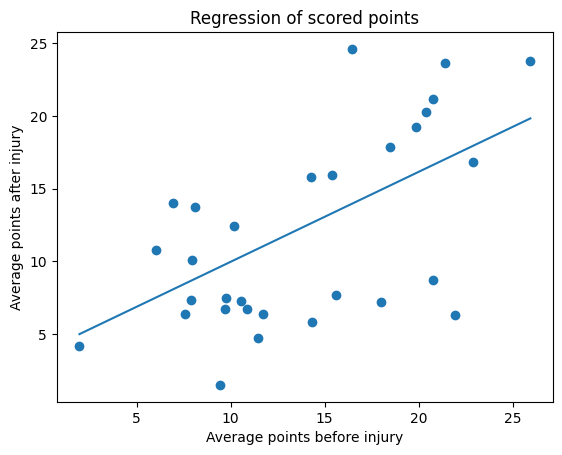

In [76]:
train_x, train_y, test_x, test_y = train_test_sets
train_x, train_y, test_x, test_y= train_x.loc[:,'PTS'], train_y.loc[:,'PTS'], test_x.loc[:,'PTS'], test_y.loc[:,'PTS']
train_x, train_y, test_x, test_y = np.array(train_x), np.array(train_y),np.array(test_x),np.array(test_y)
X_all = np.concatenate((train_x, test_x))
y_all = np.concatenate((train_y, test_y))
coef = results_single.loc[0, 'Coefficients']  # make sure it's a scalar or array
intercept = results_single.loc[0, 'Intercept']
regression_plot(X_all, y_all, intercept, coef, "Average points before injury", "Average points after injury", "Regression of scored points")